In [1]:
# at this stage in the book we haven't actually installed matplotlib,
# comment this out if you need to
from matplotlib import pyplot as plt

##########################
#                        #
# FINDING KEY CONNECTORS #
#                        #
##########################

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]
users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'},
 {'id': 10, 'name': 'Jen'}]

In [2]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [3]:
# first give each user an empty list
for user in users:
    user["friends"] = []

# and then populate the lists with friendships
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user)
                        for user in users) # 24

num_users = len(users)
avg_connections = total_connections / num_users # 2.4

In [4]:
users

[{'id': 0,
  'name': 'Hero',
  'friends': [{'id': 1,
    'name': 'Dunn',
    'friends': [{...},
     {'id': 2,
      'name': 'Sue',
      'friends': [{...},
       {...},
       {'id': 3,
        'name': 'Chi',
        'friends': [{...},
         {...},
         {'id': 4,
          'name': 'Thor',
          'friends': [{...},
           {'id': 5,
            'name': 'Clive',
            'friends': [{...},
             {'id': 6,
              'name': 'Hicks',
              'friends': [{...},
               {'id': 8,
                'name': 'Kate',
                'friends': [{...},
                 {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]},
                 {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]},
             {'id': 7,
              'name': 'Devin',
              'friends': [{...},
               {'id': 8,
                'name': 'Kate',
                'friends': [{'id': 6,
                  'name': 'Hicks',
                  'friends': [{...}, {...}]},
        

In [18]:
print("total connections", total_connections)
print("number of users", num_users)
print("average connections", avg_connections)

total connections 24
number of users 11
average connections 2.1818181818181817


In [19]:
################################
#                              #
# DATA SCIENTISTS YOU MAY KNOW #
#                              #
################################

def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"] # for each of user's friends
            for foaf in friend["friends"]] # get each of _their_ friends

from collections import Counter # not loaded by default

def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # for each of my friends
                   for foaf in friend["friends"]  # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))   # and aren't my friends

print(friends_of_friend_ids(users[3])) # Counter({0: 2, 5: 1})

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id["user_id"]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)

Counter({0: 2, 5: 1})


In [23]:
data_scientists_who_like("Big Data")

[0, 8, 9]

In [24]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

salary_by_tenure_bucket defaultdict(<class 'list'>, {})
salary 83000
tenure 8.7
salary 88000
tenure 8.1
salary 48000
tenure 0.7
salary 76000
tenure 6
salary 69000
tenure 6.5
salary 76000
tenure 7.5
salary 60000
tenure 2.5
salary 83000
tenure 10
salary 48000
tenure 1.9
salary 63000
tenure 4.2


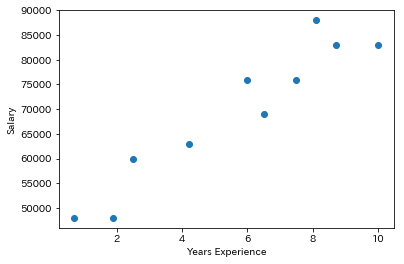

In [15]:
###########################
#                         #
# SALARIES AND EXPERIENCE #
#                         #
###########################

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

# keys are years
# values are the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

print("salary_by_tenure_bucket", salary_by_tenure_bucket)

for salary, tenure in salaries_and_tenures:
    print("salary", salary)
    print("tenure", tenure)
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    # print("salary_by_tenure_bucket", salary_by_tenure_bucket)
    
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

make_chart_salaries_by_tenure()

In [16]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [17]:
    print()
    print("######################")
    print("#")
    print("# SALARIES AND TENURES")
    print("#")
    print("######################")
    print()

    print("average salary by tenure", average_salary_by_tenure)
    print("average salary by tenure bucket", average_salary_by_bucket)



######################
#
# SALARIES AND TENURES
#
######################

average salary by tenure {8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
average salary by tenure bucket {'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


In [26]:
#################
#               #
# PAID_ACCOUNTS #
#               #
#################

def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"


In [27]:
######################
#                    #
# TOPICS OF INTEREST #
#                    #
######################

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())


In [28]:


if __name__ == "__main__":

    print()
    print("######################")
    print("#")
    print("# FINDING KEY CONNECTORS")
    print("#")
    print("######################")
    print()


    print("total connections", total_connections)
    print("number of users", num_users)
    print("average connections", total_connections / num_users)
    print()

    # create a list (user_id, number_of_friends)
    num_friends_by_id = [(user["id"], number_of_friends(user))
                         for user in users]

    print("users sorted by number of friends:")
    print(sorted(num_friends_by_id,
                 key=lambda pair: pair[1],                       # by number of friends
                 reverse=True))                                  # largest to smallest

    print()
    print("######################")
    print("#")
    print("# DATA SCIENTISTS YOU MAY KNOW")
    print("#")
    print("######################")
    print()


    print("friends of friends bad for user 0:", friends_of_friend_ids_bad(users[0]))
    print("friends of friends for user 3:", friends_of_friend_ids(users[3]))

    print()
    print("######################")
    print("#")
    print("# SALARIES AND TENURES")
    print("#")
    print("######################")
    print()

    print("average salary by tenure", average_salary_by_tenure)
    print("average salary by tenure bucket", average_salary_by_bucket)

    print()
    print("######################")
    print("#")
    print("# MOST COMMON WORDS")
    print("#")
    print("######################")
    print()

    for word, count in words_and_counts.most_common():
        if count > 1:
            print(word, count)



######################
#
# FINDING KEY CONNECTORS
#
######################

total connections 24
number of users 11
average connections 2.1818181818181817

users sorted by number of friends:
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1), (10, 0)]

######################
#
# DATA SCIENTISTS YOU MAY KNOW
#
######################

friends of friends bad for user 0: [0, 2, 3, 0, 1, 3]
friends of friends for user 3: Counter({0: 2, 5: 1})

######################
#
# SALARIES AND TENURES
#
######################

average salary by tenure {8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
average salary by tenure bucket {'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}

######################
#
# MOST COMMON WORDS
#
######################

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
s